# Bank Marketing

## Pendahuluan
Dataset Bank Marketing ini berasal dari sebuah studi pemasaran langsung (direct marketing) yang dilakukan oleh sebuah lembaga perbankan di Portugal. Tujuan utama dari kampanye pemasaran ini adalah untuk mempromosikan produk term deposit (deposito berjangka) kepada nasabah. Dalam prosesnya, kampanye ini dilakukan melalui panggilan telepon, dan dalam beberapa kasus, klien dihubungi lebih dari satu kali untuk mengevaluasi kemungkinan mereka berlangganan produk tersebut.

Dataset ini berisi informasi demografis dan perilaku nasabah, serta atribut terkait kampanye pemasaran yang dilakukan. Informasi tersebut mencakup variabel seperti pekerjaan, status pernikahan, tingkat pendidikan, hasil kampanye sebelumnya, durasi panggilan, serta data ekonomi makro saat kampanye berlangsung. Target klasifikasi dari dataset ini adalah variabel y, yang menunjukkan apakah klien bersedia untuk berlangganan deposito berjangka (yes) atau tidak (no).

Terdapat empat versi dataset, dua di antaranya mencakup 20 atribut input dan dua lainnya memiliki 17 atribut input. Dataset dengan jumlah data lengkap dan yang lebih kecil disediakan untuk kebutuhan eksperimen dan pembelajaran mesin, khususnya untuk menyesuaikan dengan tingkat komputasi yang tersedia.

Dataset ini banyak digunakan dalam penelitian dan eksperimen machine learning untuk mengembangkan model klasifikasi yang mampu memprediksi keputusan nasabah secara akurat berdasarkan data historis pemasaran dan karakteristik individu mereka.



## Data understanding
  ### sumber data
  'https://archive.ics.uci.edu/dataset/222/bank+marketing'

## tujuan
Tujuan dari dataset bank marketing ini adalah untuk memprediksi apakah seorang nasabah akan berlangganan produk deposito berjangka (term deposit) dari sebuah institusi perbankan Portugis, berdasarkan berbagai informasi demografis, sosio-ekonomi, dan data interaksi marketing (terutama via panggilan telepon).

Klasifikasi biner: Memprediksi label target y dengan dua nilai:

'yes' → nasabah berlangganan deposito

'no' → nasabah tidak berlangganan deposito

In [1]:
pip install ucimlrepo

In [8]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# metadata
print(bank_marketing.metadata)

# variable information
print(bank_marketing.variables)


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

## Eksploitasi Data

In [9]:
# Tampilkan 10 baris pertama dari fitur dan target
print("=== Fitur (X) ===")
display(X.head(10))

print("\n=== Target (y) ===")
display(y.head(10))


=== Fitur (X) ===


,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN
5,35,management,married,tertiary,no,231,yes,no,NaN,5,may,139,1,-1,0,NaN
6,28,management,single,tertiary,no,447,yes,yes,NaN,5,may,217,1,-1,0,NaN
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,NaN,5,may,380,1,-1,0,NaN
8,58,retired,married,primary,no,121,yes,no,NaN,5,may,50,1,-1,0,NaN
9,43,technician,single,secondary,no,593,yes,no,NaN,5,may,55,1,-1,0,NaN



=== Target (y) ===


,y
0,no
1,no
2,no
3,no
4,no
5,no
6,no
7,no
8,no
9,no


/tmp/ipython-input-10-83263574.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y', data=df, palette='Set2', ax=axs[0, 0])
/tmp/ipython-input-10-83263574.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='job', order=df['job'].value_counts().index, palette='viridis', ax=axs[0, 2])
/tmp/ipython-input-10-83263574.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='y', y='duration', palette='coolwarm', ax=axs[1, 0])


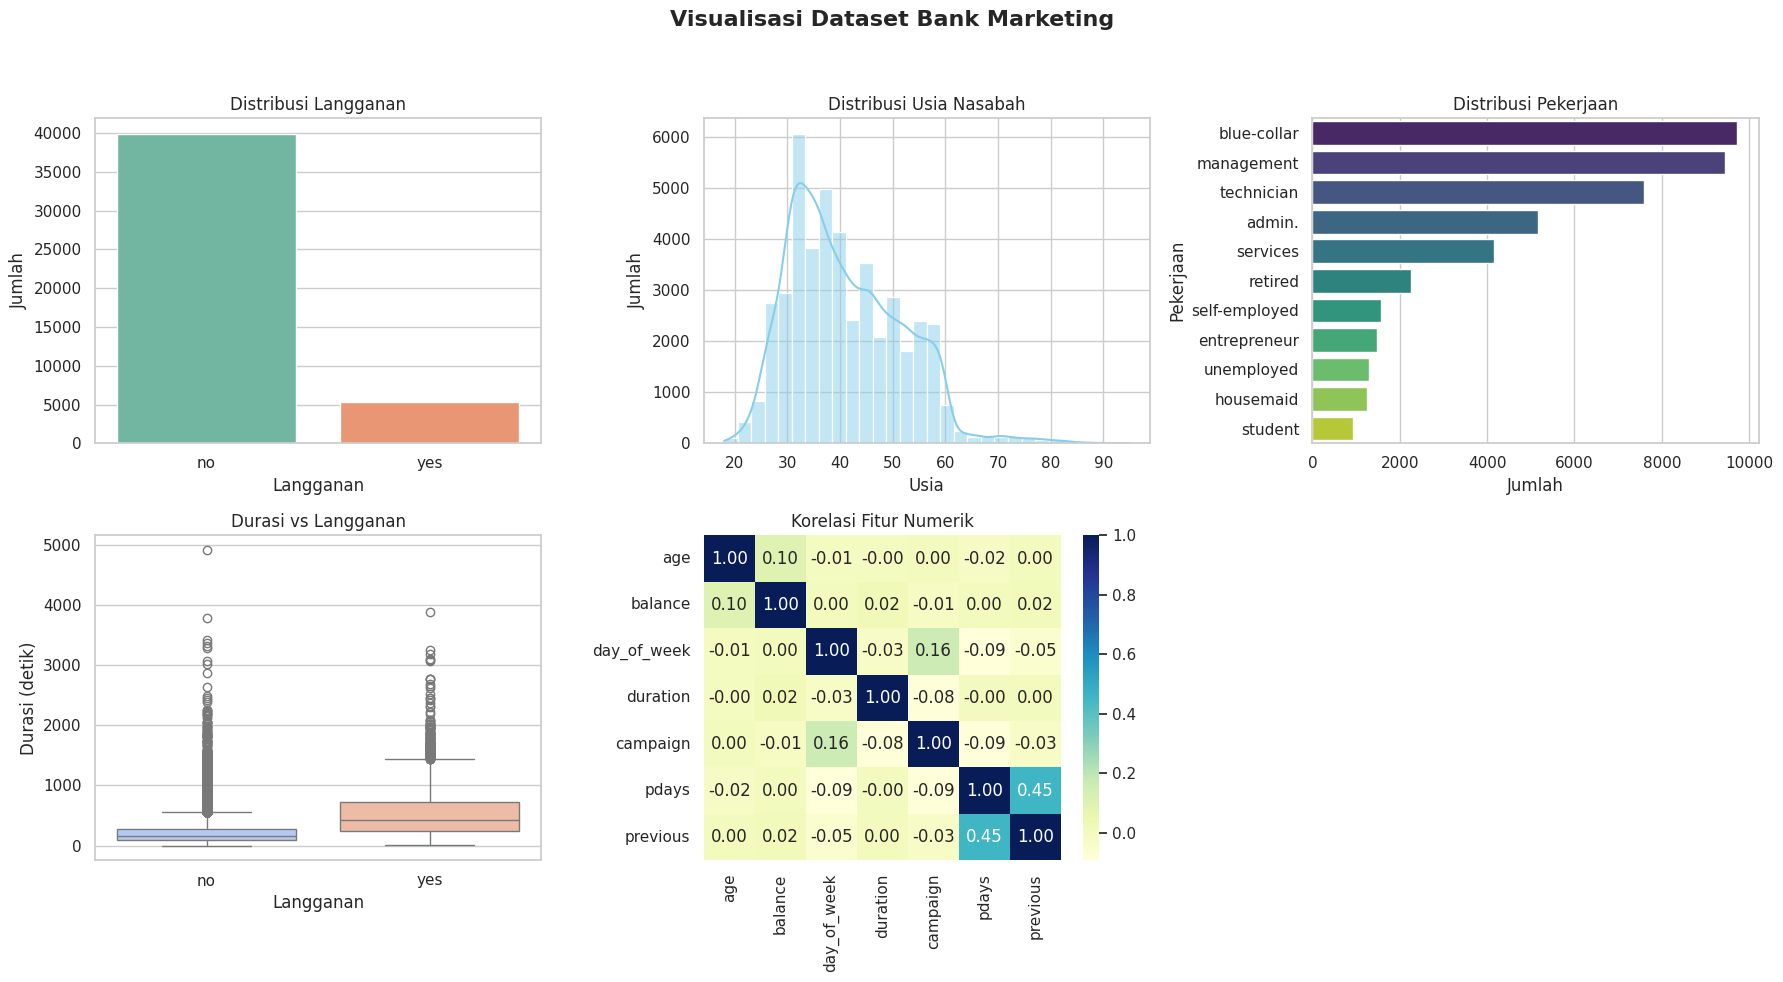

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

# Dataset
bank_marketing = fetch_ucirepo(id=222)
X = bank_marketing.data.features
y = bank_marketing.data.targets
df = pd.concat([X, y], axis=1)

# Set style
sns.set(style='whitegrid')

# Siapkan canvas: 2 baris, 3 kolom
fig, axs = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Visualisasi Dataset Bank Marketing', fontsize=16, fontweight='bold')

# 1. Distribusi Target
sns.countplot(x='y', data=df, palette='Set2', ax=axs[0, 0])
axs[0, 0].set_title('Distribusi Langganan')
axs[0, 0].set_xlabel('Langganan')
axs[0, 0].set_ylabel('Jumlah')

# 2. Distribusi Usia
sns.histplot(df['age'], bins=30, kde=True, color='skyblue', ax=axs[0, 1])
axs[0, 1].set_title('Distribusi Usia Nasabah')
axs[0, 1].set_xlabel('Usia')
axs[0, 1].set_ylabel('Jumlah')

# 3. Pekerjaan Nasabah
sns.countplot(data=df, y='job', order=df['job'].value_counts().index, palette='viridis', ax=axs[0, 2])
axs[0, 2].set_title('Distribusi Pekerjaan')
axs[0, 2].set_xlabel('Jumlah')
axs[0, 2].set_ylabel('Pekerjaan')

# 4. Durasi Panggilan vs Langganan
sns.boxplot(data=df, x='y', y='duration', palette='coolwarm', ax=axs[1, 0])
axs[1, 0].set_title('Durasi vs Langganan')
axs[1, 0].set_xlabel('Langganan')
axs[1, 0].set_ylabel('Durasi (detik)')

# 5. Korelasi Fitur Numerik
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='YlGnBu', fmt=".2f", ax=axs[1, 1])
axs[1, 1].set_title('Korelasi Fitur Numerik')

# 6. Kosongkan plot terakhir atau beri informasi
axs[1, 2].axis('off')  # Kosong (bisa juga untuk teks tambahan)

# Tata letak rapi
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Supaya title tidak terpotong
plt.show()


## Struktur Dataset

In [14]:
import pandas as pd
from ucimlrepo import fetch_ucirepo

# Ambil dataset
bank_marketing = fetch_ucirepo(id=222)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# Gabungkan fitur dan target
df = pd.concat([X, y], axis=1)

# 1. Bentuk dataset (jumlah baris dan kolom)
print("=== Bentuk Dataset ===")
print(df.shape)  # (rows, columns)

# 2. Nama kolom dan tipe data
print("\n=== Nama Kolom dan Tipe Data ===")
print(df.dtypes)

# 3. Informasi ringkas
print("\n=== Info Dataset ===")
df.info()

# 4. Contoh data teratas
print("\n=== Contoh Data (head) ===")
print(df.head())

# # 5. Cek jumlah nilai unik dan missing
# print("\n=== Jumlah Nilai Unik dan Missing ===")
# for col in df.columns:
#     print(f"{col:20} | Unique: {df[col].nunique():3d} | Missing: {df[col].isnull().sum():3d}")


=== Bentuk Dataset ===
(45211, 17)

=== Nama Kolom dan Tipe Data ===
age             int64
job            object
marital        object
education      object
default        object
balance         int64
housing        object
loan           object
contact        object
day_of_week     int64
month          object
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome       object
y              object
dtype: object

=== Info Dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8

### Jumlah Fitur
Dataset ini memiliki total 21 kolom, yang terdiri dari:

20 fitur (independent variables) → digunakan sebagai input model prediksi

1 target (dependent variable) → kolom y yang berisi label 'yes' atau 'no'

### Target (Kolom y)
Kolom y menunjukkan apakah nasabah berlangganan deposito:

yes → berlangganan

no → tidak berlangganan

## Identifikasi Kualitas Dataset

### Deteksi Missing Value
Missing value adalah kondisi di mana suatu data atau nilai dalam dataset tidak tersedia atau tidak tercatat. Dalam konteks pengolahan data, missing value menjadi hal penting karena dapat mempengaruhi kualitas analisis, visualisasi, dan akurasi model machine learning.

Missing value bisa muncul karena berbagai alasan, antara lain:

- Kesalahan saat pengumpulan data.

- Data memang tidak diberikan oleh responden.

- Sistem pencatatan yang tidak lengkap.

- Informasi yang tidak relevan atau bersifat sensitif, sehingga tidak diisi.

Contoh bentuk missing value:

- Kosong atau null (``, null, NaN).

- Diwakili dengan string khusus seperti 'unknown', 'n/a', atau '-'.

Dampak Missing Value:
- Analisis statistik bisa bias.

- Model prediksi bisa salah belajar jika missing value tidak ditangani.

- Beberapa algoritma machine learning tidak bisa berjalan jika ada missing value.

Penanganan Missing Value:
- Menghapus baris atau kolom yang memiliki banyak missing value.

Mengisi (imputasi) dengan nilai tertentu, misalnya:

- Rata-rata (mean), median, modus.

- Nilai yang paling sering muncul (untuk data kategorikal).

- Memperlakukan sebagai kategori khusus (misalnya 'unknown' dianggap satu nilai).



In [15]:
import pandas as pd
from ucimlrepo import fetch_ucirepo

# Fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# Extract features and target
X = bank_marketing.data.features
y = bank_marketing.data.targets

# Gabungkan fitur dan target menjadi satu DataFrame
df = pd.concat([X, y], axis=1)

# --- Deteksi Missing Value ---

# 1. Menampilkan jumlah missing value di setiap kolom
print("Jumlah missing value per kolom:")
print(df.isnull().sum())

# 2. Menampilkan persentase missing value
print("\nPersentase missing value per kolom:")
print((df.isnull().mean() * 100).round(2))

# 3. Menampilkan kolom yang memiliki missing value saja
print("\nKolom dengan missing value:")
missing_cols = df.columns[df.isnull().any()]
print(missing_cols.tolist())

# 4. Menampilkan beberapa baris yang mengandung missing value (opsional)
print("\nContoh baris dengan missing value:")
print(df[df.isnull().any(axis=1)].head())


Jumlah missing value per kolom:
age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
y                  0
dtype: int64

Persentase missing value per kolom:
age             0.00
job             0.64
marital         0.00
education       4.11
default         0.00
balance         0.00
housing         0.00
loan            0.00
contact        28.80
day_of_week     0.00
month           0.00
duration        0.00
campaign        0.00
pdays           0.00
previous        0.00
poutcome       81.75
y               0.00
dtype: float64

Kolom dengan missing value:
['job', 'education', 'contact', 'poutcome']

Contoh baris dengan missing value:
   age           job  marital  education default  balance housing loan  \
0   58

Fitur dengan missing value nantinya akan dilakukan imputasi dengan 3 metode, yaitu SVM,KNN,Neive Bayes pada Preprocessing.

# Preprocessing Data

## Tranformasi Data

In [20]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Ambil data fitur
X = bank_marketing.data.features.copy()

# Simpan LabelEncoder untuk setiap kolom kategori
encoders = {}

# Mengembalikan data ke bentuk sebelum encoding
for col, le in encoders.items():
    X[col] = le.inverse_transform(X[col])

print("\nsebelum transformasi:")
print(X.head())



sebelum transformasi:
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married        NaN      no     1506     yes   no   
4   33           NaN   single        NaN      no        1      no   no   

  contact  day_of_week month  duration  campaign  pdays  previous poutcome  
0     NaN            5   may       261         1     -1         0      NaN  
1     NaN            5   may       151         1     -1         0      NaN  
2     NaN            5   may        76         1     -1         0      NaN  
3     NaN            5   may        92         1     -1         0      NaN  
4     NaN            5   may       198         1     -1         0      NaN  


In [19]:
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    encoders[col] = le

print("Setelah transformasi (Label Encoding):")
print(X.head())

Setelah transformasi (Label Encoding):
   age  job  marital  education  default  balance  housing  loan  contact  \
0   58    4        1          2        0     2143        1     0        2   
1   44    9        2          1        0       29        1     0        2   
2   33    2        1          1        0        2        1     1        2   
3   47    1        1          3        0     1506        1     0        2   
4   33   11        2          3        0        1        0     0        2   

   day_of_week  month  duration  campaign  pdays  previous  poutcome  
0            5      8       261         1     -1         0         3  
1            5      8       151         1     -1         0         3  
2            5      8        76         1     -1         0         3  
3            5      8        92         1     -1         0         3  
4            5      8       198         1     -1         0         3  


# Imputasi Mising Value

## Imputasi Missing Value dengan KNN

In [21]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

# Salin data dan encode dulu karena KNN hanya bisa dengan data numerik
df_knn = df.copy()
encoders = {}
for col in df_knn.columns:
    if df_knn[col].dtype == 'object':
        le = LabelEncoder()
        df_knn[col] = le.fit_transform(df_knn[col].astype(str))
        encoders[col] = le

# Imputasi KNN
knn_imputer = KNNImputer(n_neighbors=5)
df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df_knn), columns=df_knn.columns)

print("Imputasi KNN selesai")
print(df_knn_imputed.head())


Imputasi KNN selesai
    age   job  marital  education  default  balance  housing  loan  contact  \
0  58.0   4.0      1.0        3.0      0.0   2143.0      1.0   0.0      1.0   
1  44.0  10.0      2.0        2.0      0.0     29.0      1.0   0.0      1.0   
2  33.0   2.0      1.0        2.0      0.0      2.0      1.0   1.0      1.0   
3  47.0   1.0      1.0        0.0      0.0   1506.0      1.0   0.0      1.0   
4  33.0   5.0      2.0        0.0      0.0      1.0      0.0   0.0      1.0   

   day_of_week  month  duration  campaign  pdays  previous  poutcome    y  
0          5.0    8.0     261.0       1.0   -1.0       0.0       1.0  0.0  
1          5.0    8.0     151.0       1.0   -1.0       0.0       1.0  0.0  
2          5.0    8.0      76.0       1.0   -1.0       0.0       1.0  0.0  
3          5.0    8.0      92.0       1.0   -1.0       0.0       1.0  0.0  
4          5.0    8.0     198.0       1.0   -1.0       0.0       1.0  0.0  


# Imputasi Missing Value dengan Naive Bayes

In [26]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB

# ----------------------------
# 1. Ambil dataset dari ucimlrepo
# ----------------------------
bank_marketing = fetch_ucirepo(id=222)
X = bank_marketing.data.features.copy()
y = bank_marketing.data.targets.copy()
df = pd.concat([X, y], axis=1)

# ----------------------------
# 2. Deteksi Missing Value
# ----------------------------
# Anggap 'unknown' sebagai missing value
df.replace('unknown', np.nan, inplace=True)

# Tampilkan jumlah missing value
print("Jumlah missing value per kolom:")
print(df.isnull().sum())

# ----------------------------
# 3. Encoding Label (agar bisa diproses oleh Naive Bayes)
# ----------------------------
df_encoded = df.copy()
encoders = {}
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
        encoders[col] = le

# ----------------------------
# 4. Imputasi Missing Value dengan Naive Bayes
# ----------------------------
target_col = 'job'

# Salin dataframe untuk proses Naive Bayes
df_nb = df_encoded.copy()

# Cek apakah ada missing value di kolom target_col
if df_nb[target_col].isnull().sum() > 0:
    # Pisahkan baris yang diketahui dan yang missing
    df_known = df_nb[df_nb[target_col].notnull()]
    df_missing = df_nb[df_nb[target_col].isnull()]

    # Pisahkan fitur dan label
    X_known = df_known.drop(columns=[target_col])
    y_known = df_known[target_col]
    X_missing = df_missing.drop(columns=[target_col])

    # Latih model Naive Bayes
    nb_model = GaussianNB()
    nb_model.fit(X_known, y_known)

    # Prediksi nilai yang hilang
    pred_missing = nb_model.predict(X_missing)

    # Imputasi hasil prediksi
    df_nb.loc[df_missing.index, target_col] = pred_missing

    print(f"Imputasi Naive Bayes selesai pada kolom '{target_col}'")
else:
    print(f"Tidak ada missing value pada kolom '{target_col}'")

# ----------------------------
# 5. Hasil akhir (preview)
# ----------------------------
print("\nData setelah imputasi:")
print(df_nb.head())


Jumlah missing value per kolom:
age                0
job              288
marital            0
education       1857
default            0
balance            0
housing            0
loan               0
contact        13020
day_of_week        0
month              0
duration           0
campaign           0
pdays              0
previous           0
poutcome       36959
y                  0
dtype: int64
Tidak ada missing value pada kolom 'job'

Data setelah imputasi:
   age  job  marital  education  default  balance  housing  loan  contact  \
0   58    4        1          3        0     2143        1     0        1   
1   44   10        2          2        0       29        1     0        1   
2   33    2        1          2        0        2        1     1        1   
3   47    1        1          0        0     1506        1     0        1   
4   33    5        2          0        0        1        0     0        1   

   day_of_week  month  duration  campaign  pdays  previous  poutcome  

# Imputasi Missing Value dengan SVM

In [28]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

# ----------------------------
# 1. Ambil dan siapkan data
# ----------------------------
bank_marketing = fetch_ucirepo(id=222)
X = bank_marketing.data.features.copy()
y = bank_marketing.data.targets.copy()
df = pd.concat([X, y], axis=1)

# Anggap 'unknown' sebagai missing value
df.replace('unknown', np.nan, inplace=True)

# Encode semua kolom kategorikal
df_encoded = df.copy()
encoders = {}
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'object':
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
        encoders[col] = le

# ----------------------------
# 2. Imputasi Missing Value dengan SVM
# ----------------------------
target_col = 'job'
df_svm = df_encoded.copy()

# Cek apakah ada missing value
if df_svm[target_col].isnull().sum() > 0:
    # Pisahkan baris yang diketahui dan hilang
    df_svm_known = df_svm[df_svm[target_col].notnull()]
    df_svm_missing = df_svm[df_svm[target_col].isnull()]

    X_svm = df_svm_known.drop(columns=[target_col])
    y_svm = df_svm_known[target_col]
    X_missing_svm = df_svm_missing.drop(columns=[target_col])

    # Latih model SVM
    svm_model = SVC()
    svm_model.fit(X_svm, y_svm)

    # Prediksi dan imputasi
    pred_svm = svm_model.predict(X_missing_svm)
    df_svm.loc[df_svm_missing.index, target_col] = pred_svm

    print(f"Imputasi SVM selesai pada kolom '{target_col}'")
else:
    print(f"Tidak ada missing value pada kolom '{target_col}'")

# ----------------------------
# 3. Hasil akhir
# ----------------------------
print("\nData setelah imputasi:")
print(df_svm.head())


Tidak ada missing value pada kolom 'job'

Data setelah imputasi:
   age  job  marital  education  default  balance  housing  loan  contact  \
0   58    4        1          3        0     2143        1     0        1   
1   44   10        2          2        0       29        1     0        1   
2   33    2        1          2        0        2        1     1        1   
3   47    1        1          0        0     1506        1     0        1   
4   33    5        2          0        0        1        0     0        1   

   day_of_week  month  duration  campaign  pdays  previous  poutcome  y  
0            5      8       261         1     -1         0         1  0  
1            5      8       151         1     -1         0         1  0  
2            5      8        76         1     -1         0         1  0  
3            5      8        92         1     -1         0         1  0  
4            5      8       198         1     -1         0         1  0  


# Normalisasi

In [29]:
from sklearn.preprocessing import MinMaxScaler

# Salin dataframe hasil imputasi
df_normalized = df_svm.copy()

# Pisahkan fitur dan target (label)
features = df_normalized.drop(columns=['y'])  # asumsi 'y' adalah target
target = df_normalized['y']

# Terapkan MinMaxScaler pada fitur saja
scaler = MinMaxScaler()
features_scaled = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

# Gabungkan kembali dengan target
df_final = pd.concat([features_scaled, target.reset_index(drop=True)], axis=1)

# Tampilkan hasil
print("Normalisasi selesai. Preview data:")
print(df_final.head())


Normalisasi selesai. Preview data:
        age       job  marital  education  default   balance  housing  loan  \
0  0.519481  0.363636      0.5   1.000000      0.0  0.092259      1.0   0.0   
1  0.337662  0.909091      1.0   0.666667      0.0  0.073067      1.0   0.0   
2  0.194805  0.181818      0.5   0.666667      0.0  0.072822      1.0   1.0   
3  0.376623  0.090909      0.5   0.000000      0.0  0.086476      1.0   0.0   
4  0.194805  0.454545      1.0   0.000000      0.0  0.072812      0.0   0.0   

   contact  day_of_week     month  duration  campaign  pdays  previous  \
0      0.5     0.133333  0.727273  0.053070       0.0    0.0       0.0   
1      0.5     0.133333  0.727273  0.030704       0.0    0.0       0.0   
2      0.5     0.133333  0.727273  0.015453       0.0    0.0       0.0   
3      0.5     0.133333  0.727273  0.018707       0.0    0.0       0.0   
4      0.5     0.133333  0.727273  0.040260       0.0    0.0       0.0   

   poutcome  y  
0  0.333333  0  
1  0.333333

# pendeteksi outlier
  ## Visualisasi Outlier (Z-Score Method)

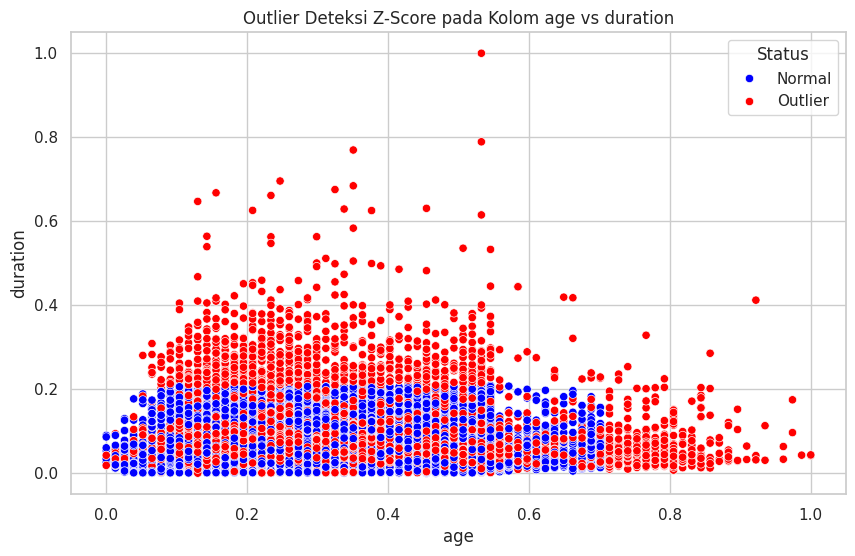

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import numpy as np

# Hitung Z-score dan deteksi outlier
z_scores = np.abs(zscore(df_final.drop(columns=['y'])))
outlier_z = (z_scores > 3)
outlier_rows_z = outlier_z.any(axis=1)

# Tambahkan kolom status outlier untuk visualisasi
df_final['outlier_z'] = np.where(outlier_rows_z, 'Outlier', 'Normal')

# Visualisasi: scatter 2D
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_final,
    x='age', y='duration',  # ganti fitur ini sesuai kolom yang ada
    hue='outlier_z',
    palette={'Normal': 'blue', 'Outlier': 'red'}
)
plt.title('Outlier Deteksi Z-Score pada Kolom age vs duration')
plt.xlabel('age')
plt.ylabel('duration')
plt.legend(title='Status')
plt.grid(True)
plt.show()


 # Visualisasi Outlier (IQR Method)

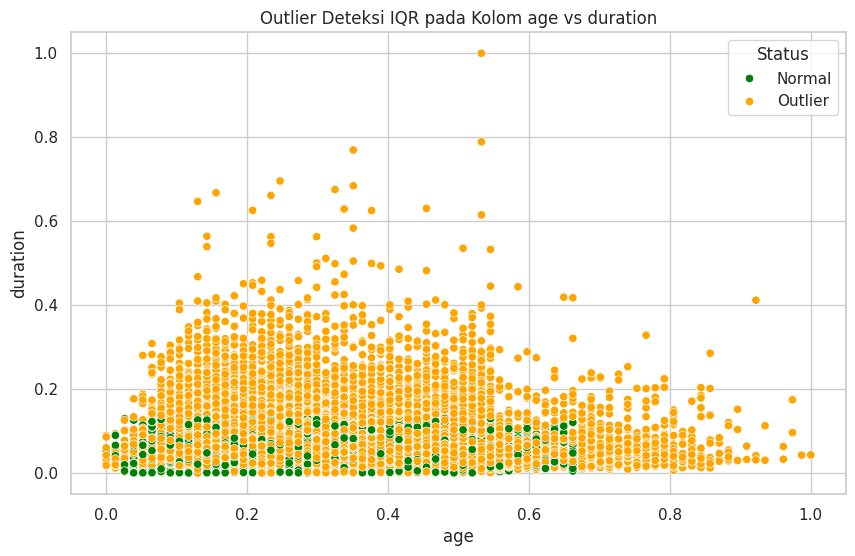

In [32]:
# Hitung IQR
data = df_final.drop(columns=['y', 'outlier_z'])  # drop tambahan kolom
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Deteksi outlier
outlier_iqr = ((data < lower_bound) | (data > upper_bound))
outlier_rows_iqr = outlier_iqr.any(axis=1)

# Tambahkan label untuk visualisasi
df_final['outlier_iqr'] = np.where(outlier_rows_iqr, 'Outlier', 'Normal')

# Visualisasi: scatter 2D
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_final,
    x='age', y='duration',  # sesuaikan kolom
    hue='outlier_iqr',
    palette={'Normal': 'green', 'Outlier': 'orange'}
)
plt.title('Outlier Deteksi IQR pada Kolom age vs duration')
plt.xlabel('age')
plt.ylabel('duration')
plt.legend(title='Status')
plt.grid(True)
plt.show()


# Lakukan klasifikasi terhadap data tersebut sesuai context data tersebut terhadap data tersebut

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# ----------------------------
# 1. Pisahkan fitur dan target
# ----------------------------
X = df_final.drop(columns=['y', 'outlier_z', 'outlier_iqr'], errors='ignore')
y = df_final['y']

# Split data 80% latih, 20% uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----------------------------
# 2A. KNN Classifier
# ----------------------------
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print("=== KNN ===")
print("Akurasi:", accuracy_score(y_test, knn_pred))
print(classification_report(y_test, knn_pred))

# ----------------------------
# 2B. Naive Bayes
# ----------------------------
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
print("=== Naive Bayes ===")
print("Akurasi:", accuracy_score(y_test, nb_pred))
print(classification_report(y_test, nb_pred))

# ----------------------------
# 2C. SVM
# ----------------------------
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
print("=== SVM ===")
print("Akurasi:", accuracy_score(y_test, svm_pred))
print(classification_report(y_test, svm_pred))


=== KNN ===
Akurasi: 0.8869844078292602
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.58      0.23      0.33      1091

    accuracy                           0.89      9043
   macro avg       0.74      0.60      0.63      9043
weighted avg       0.86      0.89      0.86      9043

=== Naive Bayes ===
Akurasi: 0.8462899480260976
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      7952
           1       0.39      0.52      0.45      1091

    accuracy                           0.85      9043
   macro avg       0.66      0.70      0.68      9043
weighted avg       0.87      0.85      0.85      9043

=== SVM ===
Akurasi: 0.8917394669910428
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7952
           1       0.70      0.18      0.28      1091

    accuracy                           0.89      9043


# Evaluasi Data

=== Evaluasi KNN ===
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.58      0.23      0.33      1091

    accuracy                           0.89      9043
   macro avg       0.74      0.60      0.63      9043
weighted avg       0.86      0.89      0.86      9043



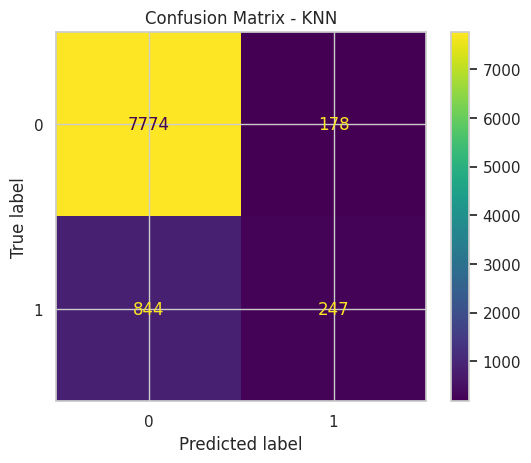

=== Evaluasi Naive Bayes ===
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      7952
           1       0.39      0.52      0.45      1091

    accuracy                           0.85      9043
   macro avg       0.66      0.70      0.68      9043
weighted avg       0.87      0.85      0.85      9043



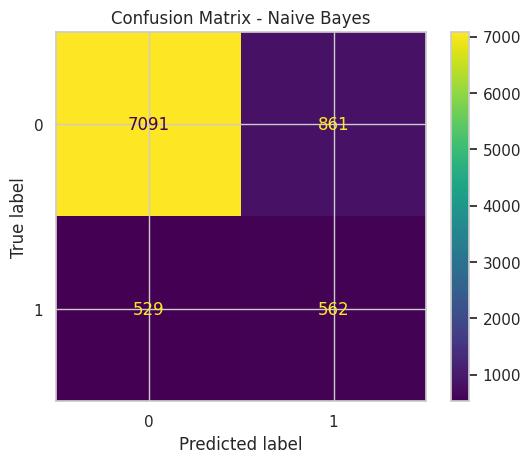

=== Evaluasi SVM ===
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7952
           1       0.70      0.18      0.28      1091

    accuracy                           0.89      9043
   macro avg       0.80      0.58      0.61      9043
weighted avg       0.87      0.89      0.86      9043



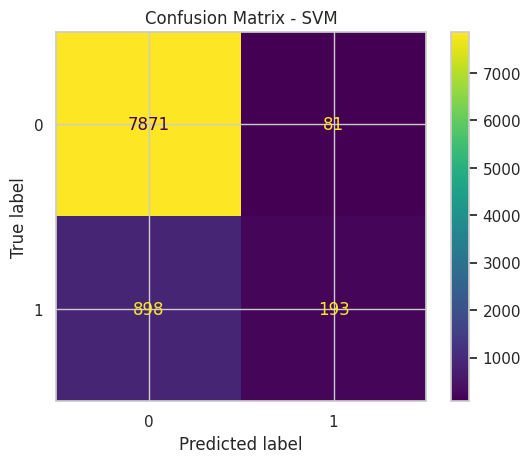

In [35]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# --- KNN ---
print("=== Evaluasi KNN ===")
print(classification_report(y_test, knn_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, knn_pred)).plot()
plt.title("Confusion Matrix - KNN")
plt.show()

# --- Naive Bayes ---
print("=== Evaluasi Naive Bayes ===")
print(classification_report(y_test, nb_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, nb_pred)).plot()
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

# --- SVM ---
print("=== Evaluasi SVM ===")
print(classification_report(y_test, svm_pred))
ConfusionMatrixDisplay(confusion_matrix(y_test, svm_pred)).plot()
plt.title("Confusion Matrix - SVM")
plt.show()
